For this notebook, I will be using only one PVS dataset, i.e, PVS - 4 with the following files:

**dataset_labels.csv,dataset_gps.csv, dataset_mpu_left.csv, dataset_mpu_right.csv**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data labels

In [2]:
#First file to be explored is the dataset_labels file. 

df1= pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 4/dataset_labels.csv')

In [3]:
df1.head()

,paved_road,unpaved_road,dirt_road,cobblestone_road,asphalt_road,no_speed_bump,speed_bump_asphalt,speed_bump_cobblestone,good_road_left,regular_road_left,bad_road_left,good_road_right,regular_road_right,bad_road_right
0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,1,0,0,0,1,1,0,0,1,0,0,1,0,0
4,1,0,0,0,1,1,0,0,1,0,0,1,0,0


This file consists of data classes- 3 different types of roads(dirt,cobblestone and asphalt), 2 road surafces (paved and unpaved), 3 types of road conditions for both left and right side(good, bad, regular) and information about speed bumps(not present, present on asphalt, present on cobblestone). All this information is present in one-hot encoded form.

In [4]:
df1.shape

(132492, 14)

In [5]:
df1.describe()

,paved_road,unpaved_road,dirt_road,cobblestone_road,asphalt_road,no_speed_bump,speed_bump_asphalt,speed_bump_cobblestone,good_road_left,regular_road_left,bad_road_left,good_road_right,regular_road_right,bad_road_right
count,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000,132492.000000
mean,0.819589,0.180411,0.180411,0.435272,0.384318,0.976346,0.004000,0.019654,0.382997,0.474278,0.142726,0.382906,0.483818,0.133276
std,0.384531,0.384531,0.384531,0.495794,0.486435,0.151970,0.063121,0.138809,0.486119,0.499340,0.349794,0.486098,0.499740,0.339874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'paved_road'}>,
        <AxesSubplot:title={'center':'unpaved_road'}>,
        <AxesSubplot:title={'center':'dirt_road'}>,
        <AxesSubplot:title={'center':'cobblestone_road'}>],
       [<AxesSubplot:title={'center':'asphalt_road'}>,
        <AxesSubplot:title={'center':'no_speed_bump'}>,
        <AxesSubplot:title={'center':'speed_bump_asphalt'}>,
        <AxesSubplot:title={'center':'speed_bump_cobblestone'}>],
       [<AxesSubplot:title={'center':'good_road_left'}>,
        <AxesSubplot:title={'center':'regular_road_left'}>,
        <AxesSubplot:title={'center':'bad_road_left'}>,
        <AxesSubplot:title={'center':'good_road_right'}>],
       [<AxesSubplot:title={'center':'regular_road_right'}>,
        <AxesSubplot:title={'center':'bad_road_right'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

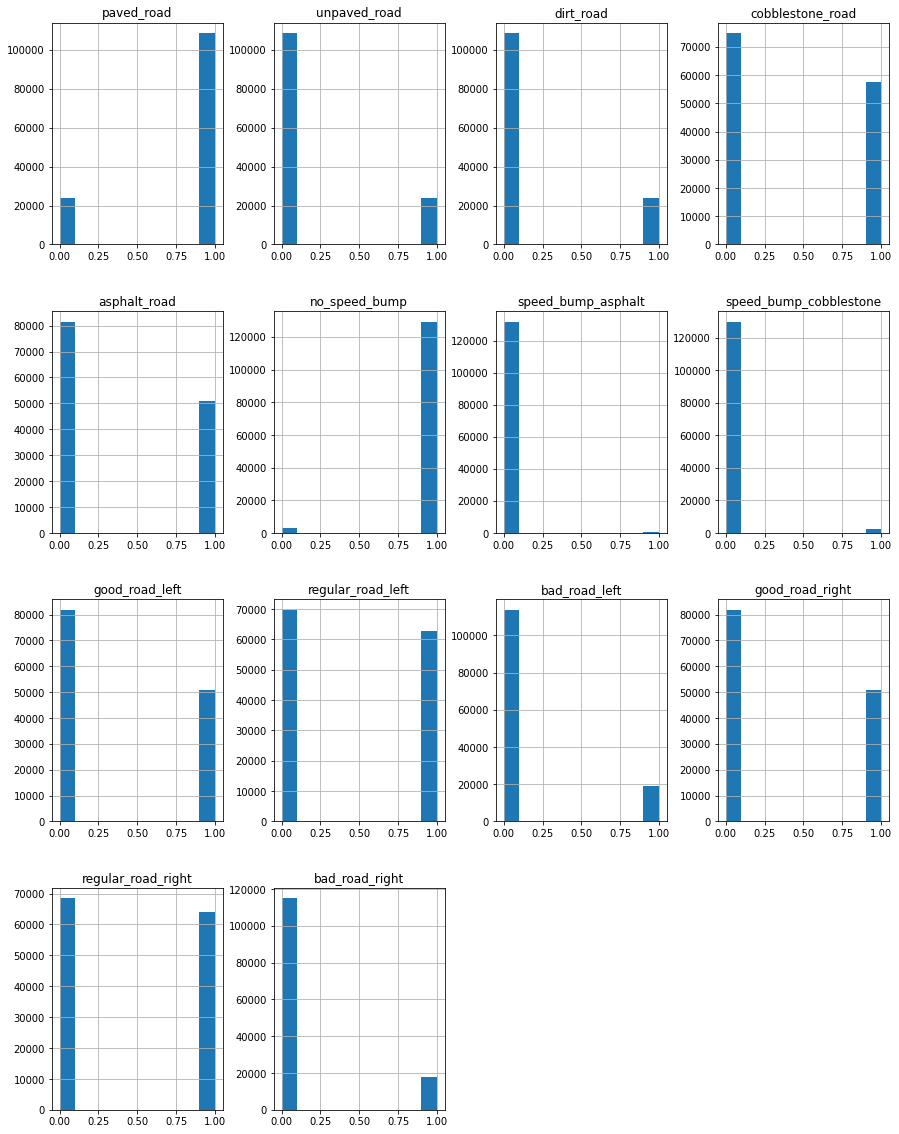

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df1.hist(ax = ax)

### GPS Data

In [7]:
#Looking at the first file: dataset_gps

df2= pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 4/dataset_gps.csv')

In [8]:
df2.head(10)

,timestamp,latitude,longitude,elevation,accuracy,bearing,speed_meters_per_second,satellites,provider,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation,distance_meters,elapsed_time_seconds
0,1.577307e+09,-27.717853,-51.098833,980.130548,4.0,229.917070,1.407003,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,0.000000,0.0
1,1.577307e+09,-27.717864,-51.098861,980.100285,4.0,252.496280,1.289992,14,gps,0.8,1.3,1.5,3.6,NaN,NaN,NaN,97,NaN,2.918860,2.0
2,1.577307e+09,-27.717862,-51.098873,980.202738,4.0,267.900600,1.203149,15,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,1.209402,1.0
3,1.577307e+09,-27.717861,-51.098886,980.363946,4.0,278.084660,1.100920,15,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,1.271522,1.0
4,1.577307e+09,-27.717854,-51.098901,979.826871,4.0,290.953950,1.116948,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,1.780105,2.0
5,1.577307e+09,-27.717853,-51.098901,979.645340,6.0,279.923680,0.355447,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,0.129331,1.0
6,1.577307e+09,-27.717851,-51.098893,979.579305,4.0,222.239730,0.083873,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,0.757557,1.0
7,1.577307e+09,-27.717851,-51.098887,979.770142,4.0,132.511060,0.308509,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,0.636697,1.0
8,1.577307e+09,-27.717852,-51.098877,980.108496,4.0,113.201740,0.765123,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,0.967646,1.0
9,1.577307e+09,-27.717854,-51.098869,980.282866,4.0,100.133835,0.764365,14,gps,0.8,1.4,1.6,3.6,NaN,NaN,NaN,97,NaN,0.751930,1.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1432 entries, 0 to 1431
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1432 non-null   float64
 1   latitude                 1432 non-null   float64
 2   longitude                1432 non-null   float64
 3   elevation                1432 non-null   float64
 4   accuracy                 1432 non-null   float64
 5   bearing                  1432 non-null   float64
 6   speed_meters_per_second  1432 non-null   float64
 7   satellites               1432 non-null   int64  
 8   provider                 1432 non-null   object 
 9   hdop                     1432 non-null   float64
 10  vdop                     1431 non-null   float64
 11  pdop                     1431 non-null   float64
 12  geoidheight              1432 non-null   float64
 13  ageofdgpsdata            0 non-null      float64
 14  dgpsid                  

Exploring each column one by one 

In [10]:
#Removing null columns 
df2=df2.drop(columns=['ageofdgpsdata','dgpsid', 'activity','annotation'])

In [11]:
df2['provider'].unique()
#As the provider is gps always, this coulmn can be removed too

array(['gps'], dtype=object)

In [12]:
#Decoding timestamps 
from datetime import datetime
dt_object = datetime.fromtimestamp(df2['timestamp'][1340])-datetime.fromtimestamp(df2['timestamp'][0])
print(dt_object)


0:22:59.999000


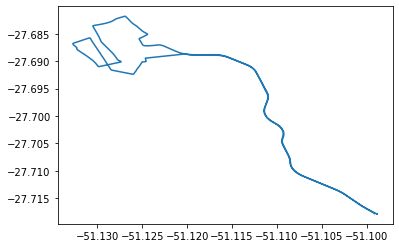

In [13]:
#Plotting how the track looks
plt.plot(df2['longitude'], df2['latitude'])

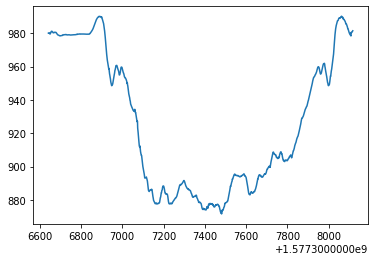

In [14]:
#How elevation changes with time
plt.plot(df2['timestamp'], df2['elevation'])

In [15]:
df2['accuracy'].unique() #Accuracy of the sensor in recording data 

array([ 4.,  6.,  8., 12.])

In [16]:
#Bearing is the compass direction from your current position to your intended destination. 
#There are a few null values for the same. This indiactes the car wasn't moving in any direction at that time
#Checking the speed/m parameter

(df2['speed_meters_per_second'] == 0).sum(axis=0)

0

In [17]:
df2['satellites'].unique() #The satellite being used to identify the GPS co-ordinates

array([14, 15, 13, 12, 11, 16, 17, 18])

The next three columns hdop, vdop and pdop are horizontal or vertical or position dilution of precision values. They describe current strength of satellite. The values can range from 1-10 and lesser values are preferred. 

In [18]:
df2['geoidheight'].unique() #Geoid Height is a scientific term that relates latitiude, longitude and height 


array([3.6])

In [19]:
df2['battery'].value_counts()

93    378
94    347
92    270
95    205
96    205
97     26
91      1
Name: battery, dtype: int64

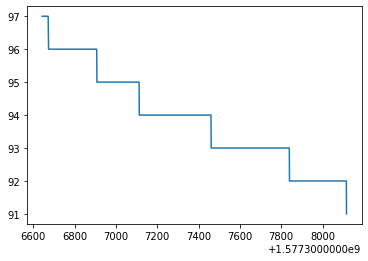

In [20]:
plt.plot(df2['timestamp'], df2['battery']) #Battery is reducing with time

In [21]:
#distance_meters is the distance covered in that given time of 1 sec
df2['distance_meters'].sum()/1000 
#total distance covered in kms

13.827232430416695

**In the gps dataset, timestamp is the index and the important features are:** 

latitude, longitude/elevation, speed/distance. Others define technicalities of the GPS system. 



### Inertial Sensor Data

We are provided with four data sets having mpu data (two for each side). The MPU-9250 is installed on the dashboard, above suspesion and below suspension on both right and left side. 2 datasets purely have data collected by mpu and 2 have data combined with GPS data(latitude longitude, speed). We will explore the mpu_left and mpu_right datasets. Both of them have the same parameters but different values

In [22]:
#mpu left file
df3=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 4/dataset_mpu_left.csv')

In [23]:
df3.head()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,...,gyro_z_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension
0,1.577307e+09,0.571221,0.192470,9.699378,0.352532,0.226281,9.770854,0.289128,0.131624,9.917638,...,-0.186012,10.209444,-8.244299,-0.255516,36.821280,-26.555846,3.912001,36.527002,35.616467,35.808159
1,1.577307e+09,0.233639,0.771867,10.020201,0.115506,0.240646,9.894155,0.246033,0.034659,9.645896,...,-0.353859,9.379408,-10.403521,0.255516,36.383973,-26.839360,3.359417,36.383233,35.568545,36.023812
2,1.577307e+09,0.109141,0.479775,9.926827,0.383656,0.214310,9.117237,0.217302,0.193873,9.979888,...,0.271752,10.873473,-8.244299,-0.255516,33.672667,-26.555846,2.017429,36.527002,35.424776,35.999850
3,1.577307e+09,0.470665,-0.192996,9.553332,0.802642,-0.228617,9.746912,0.258004,0.122047,9.608786,...,0.119164,8.549372,-8.636885,-0.596204,33.672667,-26.555846,2.017429,36.527002,35.520622,35.856082
4,1.577307e+09,0.518549,0.252325,9.814300,0.143039,0.375919,9.793599,0.275960,-0.019211,9.600407,...,-0.430153,8.549372,-8.636885,-0.596204,36.733819,-26.839360,6.517038,36.622847,35.448738,35.904005


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132492 entries, 0 to 132491
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   timestamp                132492 non-null  float64
 1   acc_x_dashboard          132492 non-null  float64
 2   acc_y_dashboard          132492 non-null  float64
 3   acc_z_dashboard          132492 non-null  float64
 4   acc_x_above_suspension   132492 non-null  float64
 5   acc_y_above_suspension   132492 non-null  float64
 6   acc_z_above_suspension   132492 non-null  float64
 7   acc_x_below_suspension   132492 non-null  float64
 8   acc_y_below_suspension   132492 non-null  float64
 9   acc_z_below_suspension   132492 non-null  float64
 10  gyro_x_dashboard         132492 non-null  float64
 11  gyro_y_dashboard         132492 non-null  float64
 12  gyro_z_dashboard         132492 non-null  float64
 13  gyro_x_above_suspension  132492 non-null  float64
 14  gyro

In [26]:
dt_object = datetime.fromtimestamp(df3['timestamp'][132491])-datetime.fromtimestamp(df3['timestamp'][0])
print(dt_object)
#Data is produced at each microsecond for total of 24 minutes 

0:22:04.910000


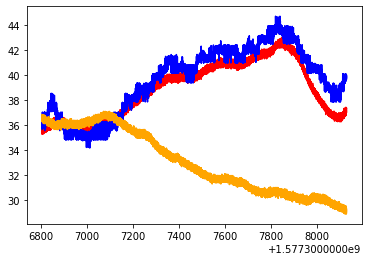

In [27]:
#Changes in temperature
plt.plot(df3['timestamp'], df3['temp_above_suspension'], color='red')
plt.plot(df3['timestamp'], df3['temp_below_suspension'], color='blue')
plt.plot(df3['timestamp'], df3['temp_dashboard'], color='orange')


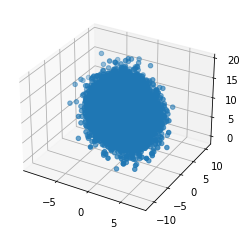

In [28]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df3['acc_x_dashboard'], df3['acc_y_dashboard'], df3['acc_z_dashboard'], cmap='Greens');



---



To get more clear trends, let's consider data produced by accelerometer as a vector with x, y and z magnitude. So, the magnitude of the vector is defined as the following:
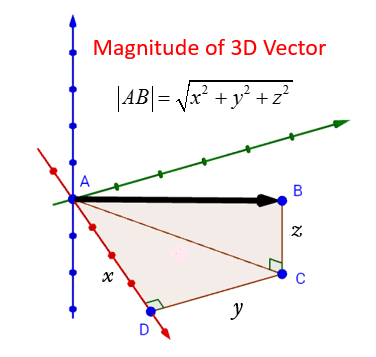
Creating new variable to store the value

In [29]:
def magnitude(vector): 
    return math.sqrt(sum(pow(element, 2) for element in vector))

In [30]:
# We will be making this new parameter for acc_dashboard, acc_above_suspension , acc_below_suspension, gyro_above_suspension, gyro_below_suspension, gyro_dashboard, mag_dashboard, mag_above  

import math

acc_dashb=[]
acc_above=[]
acc_below=[]
gyro_above=[]
gyro_below=[]
gyro_dashb=[]
mag_dashb=[]
mag_above=[]

for i in range(0, len(df3)):
  vector=np.array([df3['acc_x_dashboard'][i],df3['acc_y_dashboard'][i],df3['acc_z_dashboard'][i]])
  acc_dashb.append(magnitude(vector))
  vector1=np.array([df3['acc_x_above_suspension'][i],df3['acc_y_above_suspension'][i],df3['acc_z_above_suspension'][i]])
  acc_above.append(magnitude(vector1))
  vector2=np.array([df3['acc_x_below_suspension'][i],df3['acc_y_below_suspension'][i],df3['acc_z_below_suspension'][i]])
  acc_below.append(magnitude(vector2))
  vector3=np.array([df3['gyro_x_above_suspension'][i],df3['gyro_y_above_suspension'][i],df3['gyro_z_above_suspension'][i]])
  gyro_above.append(magnitude(vector3))
  vector4=np.array([df3['gyro_x_below_suspension'][i],df3['gyro_y_below_suspension'][i],df3['gyro_z_below_suspension'][i]])
  gyro_below.append(magnitude(vector4))
  vector5=np.array([df3['gyro_x_dashboard'][i],df3['gyro_y_dashboard'][i],df3['gyro_z_dashboard'][i]])
  gyro_dashb.append(magnitude(vector5))
  vector6=np.array([df3['mag_x_dashboard'][i],df3['mag_y_dashboard'][i],df3['mag_z_dashboard'][i]])
  mag_dashb.append(magnitude(vector6))
  vector7=np.array([df3['mag_x_above_suspension'][i],df3['mag_y_above_suspension'][i],df3['mag_z_above_suspension'][i]])
  mag_above.append(magnitude(vector7))


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Acc_below_suspension')

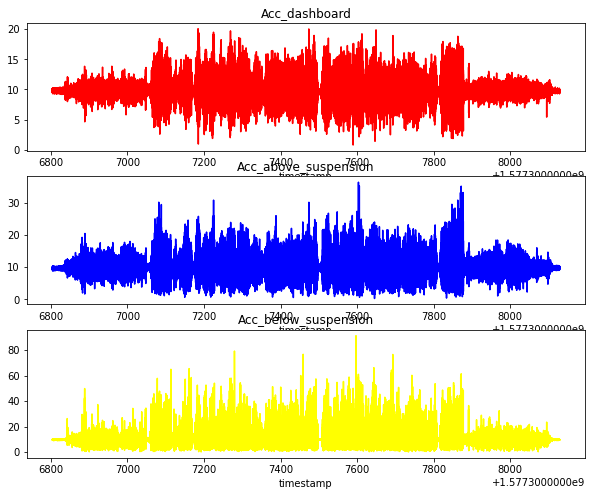

In [31]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df3['timestamp'], acc_dashb, color='red', ax=ax)
ax.set_title('Acc_dashboard')

ax = fig.add_subplot(312)
sns.lineplot(df3['timestamp'], acc_above, color='blue', ax=ax)
ax.set_title('Acc_above_suspension')

ax = fig.add_subplot(313)
sns.lineplot(df3['timestamp'], acc_below, color='yellow', ax=ax)
ax.set_title('Acc_below_suspension')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gyro_below_suspension')

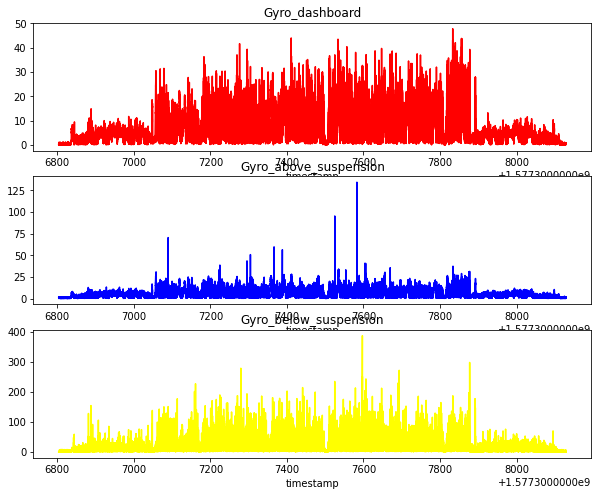

In [32]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df3['timestamp'], gyro_dashb, color='red', ax=ax)
ax.set_title('Gyro_dashboard')

ax = fig.add_subplot(312)
sns.lineplot(df3['timestamp'], gyro_above, color='blue', ax=ax)
ax.set_title('Gyro_above_suspension')

ax = fig.add_subplot(313)
sns.lineplot(df3['timestamp'], gyro_below, color='yellow', ax=ax)
ax.set_title('Gyro_below_suspension')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mag_suspension')

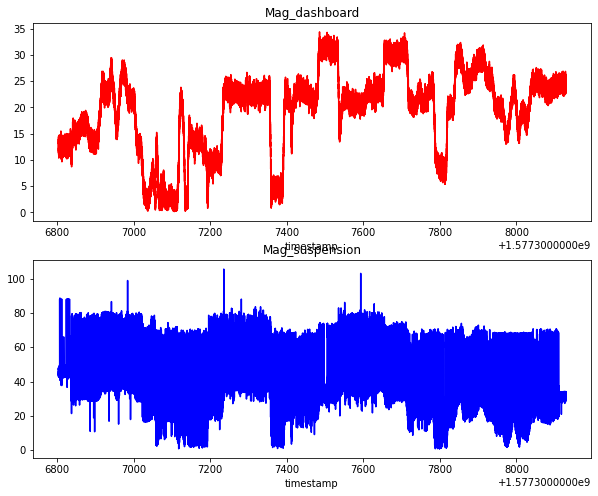

In [33]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(211)
sns.lineplot(df3['timestamp'], mag_dashb, color='red', ax=ax)
ax.set_title('Mag_dashboard')

ax = fig.add_subplot(212)
sns.lineplot(df3['timestamp'], mag_above, color='blue', ax=ax)
ax.set_title('Mag_suspension')




<AxesSubplot:>

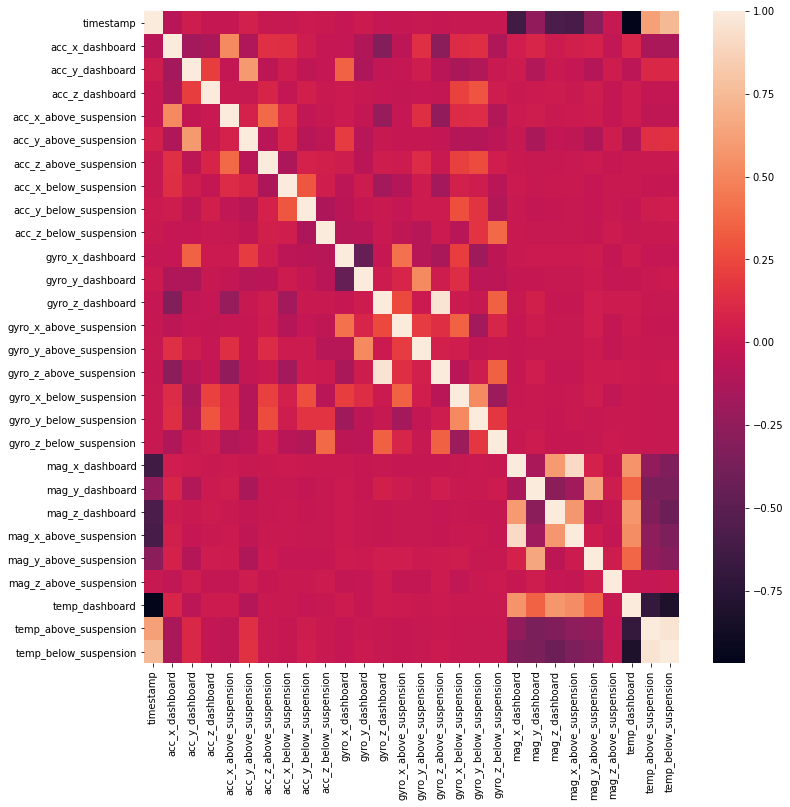

In [34]:
#Checking for correlation 
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df3.corr(), ax=ax)


In [35]:
df4=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 4/dataset_mpu_right.csv')
df4.head()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,...,gyro_z_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension
0,1.577307e+09,0.305086,-0.166689,9.611639,0.383773,0.144586,9.985865,0.443497,0.350237,9.955775,...,-0.596001,13.505487,-5.536778,0.940633,41.145115,-14.066148,-30.997490,35.927966,41.079672,36.718693
1,1.577307e+09,0.574433,0.035621,9.823526,0.493906,-0.056527,9.672224,0.601515,0.238907,9.660091,...,0.166938,11.899940,-5.454139,2.052289,8.255152,-12.106329,-31.814337,35.951927,41.031749,36.862461
2,1.577307e+09,0.363743,0.703603,10.206598,0.189843,0.372036,9.796723,0.721225,-0.073536,10.118580,...,0.197456,13.599931,-4.627754,0.855121,8.048297,-10.386489,-37.532269,35.951927,41.031749,36.910384
3,1.577307e+09,0.179390,0.464183,10.043793,0.357437,0.228383,10.031355,0.637428,0.201797,10.176041,...,-0.565483,13.977707,-4.627754,1.539217,8.048297,-10.546474,-38.621399,35.999850,41.127595,36.718693
4,1.577307e+09,0.488242,-0.310341,9.509886,0.520243,-0.190602,9.957134,0.529689,0.319113,9.747479,...,-0.534966,12.749936,-4.875670,1.624729,7.634587,-10.786452,-38.076834,36.119657,41.127595,36.814539


In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132492 entries, 0 to 132491
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   timestamp                132492 non-null  float64
 1   acc_x_dashboard          132492 non-null  float64
 2   acc_y_dashboard          132492 non-null  float64
 3   acc_z_dashboard          132492 non-null  float64
 4   acc_x_above_suspension   132492 non-null  float64
 5   acc_y_above_suspension   132492 non-null  float64
 6   acc_z_above_suspension   132492 non-null  float64
 7   acc_x_below_suspension   132492 non-null  float64
 8   acc_y_below_suspension   132492 non-null  float64
 9   acc_z_below_suspension   132492 non-null  float64
 10  gyro_x_dashboard         132492 non-null  float64
 11  gyro_y_dashboard         132492 non-null  float64
 12  gyro_z_dashboard         132492 non-null  float64
 13  gyro_x_above_suspension  132492 non-null  float64
 14  gyro

Exactly same parameters as previous dataset and no null values. 

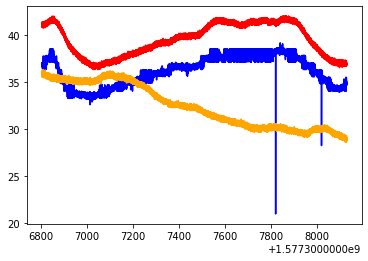

In [37]:
#Changes in temperature
plt.plot(df4['timestamp'], df4['temp_above_suspension'], color='red')
plt.plot(df4['timestamp'], df4['temp_below_suspension'], color='blue')
plt.plot(df4['timestamp'], df4['temp_dashboard'], color='orange')


In [38]:
# We will be making this new parameter for acc_dashboard, acc_above_suspension , acc_below_suspension, gyro_above_suspension, gyro_below_suspension, gyro_dashboard, mag_dashboard, mag_above  
racc_dashb=[]
racc_above=[]
racc_below=[]
rgyro_above=[]
rgyro_below=[]
rgyro_dashb=[]
rmag_dashb=[]
rmag_above=[]

for i in range(0, len(df4)):
  vector=np.array([df4['acc_x_dashboard'][i],df4['acc_y_dashboard'][i],df4['acc_z_dashboard'][i]])
  racc_dashb.append(magnitude(vector))
  vector1=np.array([df4['acc_x_above_suspension'][i],df4['acc_y_above_suspension'][i],df4['acc_z_above_suspension'][i]])
  racc_above.append(magnitude(vector1))
  vector2=np.array([df4['acc_x_below_suspension'][i],df4['acc_y_below_suspension'][i],df4['acc_z_below_suspension'][i]])
  racc_below.append(magnitude(vector2))
  vector3=np.array([df4['gyro_x_above_suspension'][i],df4['gyro_y_above_suspension'][i],df4['gyro_z_above_suspension'][i]])
  rgyro_above.append(magnitude(vector3))
  vector4=np.array([df4['gyro_x_below_suspension'][i],df4['gyro_y_below_suspension'][i],df4['gyro_z_below_suspension'][i]])
  rgyro_below.append(magnitude(vector4))
  vector5=np.array([df4['gyro_x_dashboard'][i],df4['gyro_y_dashboard'][i],df4['gyro_z_dashboard'][i]])
  rgyro_dashb.append(magnitude(vector5))
  vector6=np.array([df4['mag_x_dashboard'][i],df4['mag_y_dashboard'][i],df4['mag_z_dashboard'][i]])
  rmag_dashb.append(magnitude(vector6))
  vector7=np.array([df4['mag_x_above_suspension'][i],df4['mag_y_above_suspension'][i],df4['mag_z_above_suspension'][i]])
  rmag_above.append(magnitude(vector7))


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Acc_below_suspension-Right')

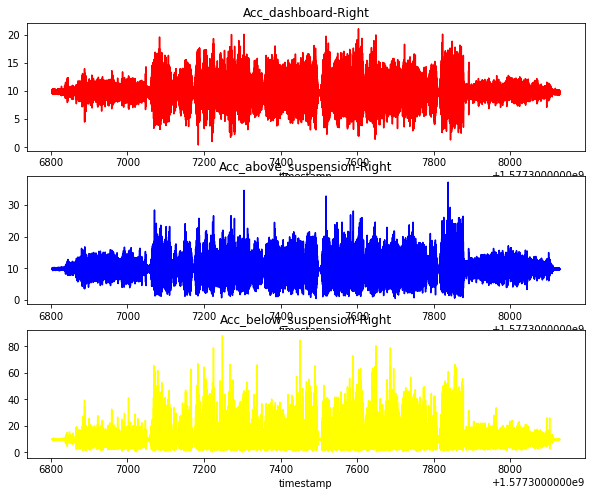

In [39]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df4['timestamp'], racc_dashb, color='red', ax=ax)
ax.set_title('Acc_dashboard-Right')

ax = fig.add_subplot(312)
sns.lineplot(df4['timestamp'], racc_above, color='blue', ax=ax)
ax.set_title('Acc_above_suspension-Right')

ax = fig.add_subplot(313)
sns.lineplot(df4['timestamp'], racc_below, color='yellow', ax=ax)
ax.set_title('Acc_below_suspension-Right')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gyro_below_suspension-Right')

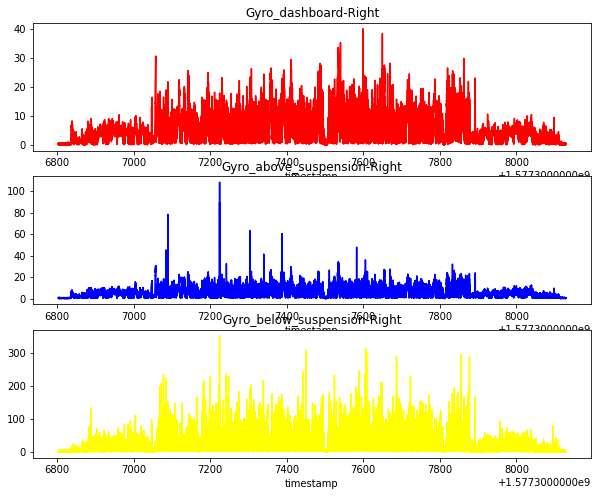

In [40]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(311)
sns.lineplot(df4['timestamp'], rgyro_dashb, color='red', ax=ax)
ax.set_title('Gyro_dashboard-Right')

ax = fig.add_subplot(312)
sns.lineplot(df4['timestamp'], rgyro_above, color='blue', ax=ax)
ax.set_title('Gyro_above_suspension-Right')

ax = fig.add_subplot(313)
sns.lineplot(df4['timestamp'], rgyro_below, color='yellow', ax=ax)
ax.set_title('Gyro_below_suspension-Right')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Mag_suspension-right')

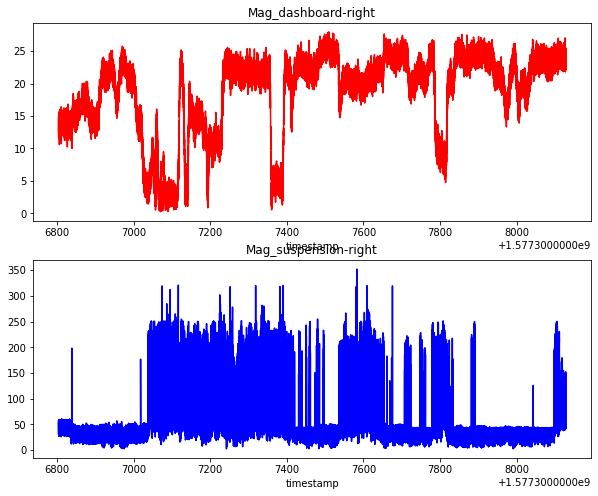

In [41]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(211)
sns.lineplot(df4['timestamp'], rmag_dashb, color='red', ax=ax)
ax.set_title('Mag_dashboard-right')

ax = fig.add_subplot(212)
sns.lineplot(df4['timestamp'], rmag_above, color='blue', ax=ax)
ax.set_title('Mag_suspension-right')


# More Data Exploration

In [42]:
#Starting with data labels file that has one hot encoded data of the road condition

df1.head()

,paved_road,unpaved_road,dirt_road,cobblestone_road,asphalt_road,no_speed_bump,speed_bump_asphalt,speed_bump_cobblestone,good_road_left,regular_road_left,bad_road_left,good_road_right,regular_road_right,bad_road_right
0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,1,0,0,0,1,1,0,0,1,0,0,1,0,0
4,1,0,0,0,1,1,0,0,1,0,0,1,0,0


In [43]:
df1.info() #No null values as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132492 entries, 0 to 132491
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   paved_road              132492 non-null  int64
 1   unpaved_road            132492 non-null  int64
 2   dirt_road               132492 non-null  int64
 3   cobblestone_road        132492 non-null  int64
 4   asphalt_road            132492 non-null  int64
 5   no_speed_bump           132492 non-null  int64
 6   speed_bump_asphalt      132492 non-null  int64
 7   speed_bump_cobblestone  132492 non-null  int64
 8   good_road_left          132492 non-null  int64
 9   regular_road_left       132492 non-null  int64
 10  bad_road_left           132492 non-null  int64
 11  good_road_right         132492 non-null  int64
 12  regular_road_right      132492 non-null  int64
 13  bad_road_right          132492 non-null  int64
dtypes: int64(14)
memory usage: 14.2 MB


In [52]:
#Creating a function that measures the distribution 
def metricsDataClass(classes):
    
    list_data = []
    list_data.append(df1[classes].sum())
       
    data = pd.DataFrame(list_data)
    data["Total"] = data.sum(axis=1)
    
    for classe in classes:
        data[classe + "%"] = round(data[classe]/data["Total"] * 100, 2)
        
    data.index = np.arange(4, len(data) + 4)
    data.index = data.index.rename("PVS")
    return data

In [53]:
#Road Surface type
metricsDataClass(["dirt_road", "cobblestone_road", "asphalt_road"])

,dirt_road,cobblestone_road,asphalt_road,Total,dirt_road%,cobblestone_road%,asphalt_road%
PVS,,,,,,,
4,23903,57670,50919,132492,18.04,43.53,38.43


In [54]:
#Road surface condition
metricsDataClass(["paved_road", "unpaved_road"])

,paved_road,unpaved_road,Total,paved_road%,unpaved_road%
PVS,,,,,
4,108589,23903,132492,81.96,18.04


In [55]:
#road roughness condition-left
metricsDataClass(["good_road_left", "regular_road_left", "bad_road_left"])

,good_road_left,regular_road_left,bad_road_left,Total,good_road_left%,regular_road_left%,bad_road_left%
PVS,,,,,,,
4,50744,62838,18910,132492,38.3,47.43,14.27


In [56]:
#road roughness condition-right
metricsDataClass(["good_road_right", "regular_road_right", "bad_road_right"])
#almost same as the left side

,good_road_right,regular_road_right,bad_road_right,Total,good_road_right%,regular_road_right%,bad_road_right%
PVS,,,,,,,
4,50732,64102,17658,132492,38.29,48.38,13.33


In [57]:
#Speed bumps
metricsDataClass(["speed_bump_asphalt", "speed_bump_cobblestone", "no_speed_bump"])


,speed_bump_asphalt,speed_bump_cobblestone,no_speed_bump,Total,speed_bump_asphalt%,speed_bump_cobblestone%,no_speed_bump%
PVS,,,,,,,
4,530,2604,129358,132492,0.4,1.97,97.63


In [58]:
#Function to convert one hot encoded values back to labels so that we can use it with other datasets
def one_hot_to_label(df_in, classes, df_out, class_name): 
    conditions = []
    for r in classes:
        conditions.append(df_in[r] == 1)
    df_out[class_name] = np.select(conditions, classes)
    return df_out

The new road type dataset will have road type, condition,quality left, quality right, bumps, Quality (avergae of left and right)

In [59]:
labels = pd.DataFrame(columns = ['road', 'condition','quality_right', 'quality_left','bumps'])

In [60]:
road_classes = ['dirt_road', 'cobblestone_road', 'asphalt_road']
quality_left_classes = ['good_road_left', 'regular_road_left', 'bad_road_left']
quality_right_classes = ['good_road_right', 'regular_road_right', 'bad_road_right']
condition_classes = ['paved_road', 'unpaved_road']
bump_classes=['no_speed_bump', 'speed_bump_asphalt', 'speed_bump_cobblestone']

In [61]:
# Convert from one-hot encoding to single label encoding
labels = one_hot_to_label(df1, road_classes, labels, 'road')
labels = one_hot_to_label(df1, quality_right_classes, labels, 'quality_right')
labels = one_hot_to_label(df1, quality_left_classes, labels, 'quality_left')
labels = one_hot_to_label(df1, condition_classes, labels, 'condition')
labels = one_hot_to_label(df1, bump_classes, labels, 'bumps')

In [62]:
# Convert road quality labels to numeric values
labels = labels.replace({'quality_right' : { 'good_road_right' : 2, 'regular_road_right' : 1, 'bad_road_right' : 0 }})
labels = labels.replace({'quality_left' : { 'good_road_left' : 2, 'regular_road_left' : 1, 'bad_road_left' : 0 }})
labels['quality'] = labels.loc[: , "quality_right":"quality_left"].mean(axis=1)
labels = labels.drop(columns = ["quality_right","quality_left"], axis = 1)

In [63]:
labels.head()

,road,condition,bumps,quality
0,asphalt_road,paved_road,no_speed_bump,2.0
1,asphalt_road,paved_road,no_speed_bump,2.0
2,asphalt_road,paved_road,no_speed_bump,2.0
3,asphalt_road,paved_road,no_speed_bump,2.0
4,asphalt_road,paved_road,no_speed_bump,2.0


From the GPS MPU dataset for left and right side, we have a total of 18 acceleration values, 18 gyrometer values and 12 magnetomter values. 


* Sum absolute values of all 18 values and combine in a single column (divided by number of axis (9)). 
*   Taking average of both left and right side values



In [64]:
acc_columns = [
    'acc_x_dashboard', 'acc_y_dashboard', 'acc_z_dashboard',
    'acc_x_above_suspension', 'acc_y_above_suspension',
    'acc_z_above_suspension', 'acc_x_below_suspension',
    'acc_y_below_suspension', 'acc_z_below_suspension'
]

gyro_columns= ['gyro_x_dashboard', 'gyro_y_dashboard', 'gyro_z_dashboard',
    'gyro_x_above_suspension', 'gyro_y_above_suspension',
    'gyro_z_above_suspension', 'gyro_x_below_suspension',
    'gyro_y_below_suspension', 'gyro_z_below_suspension']

mag_columns= ['mag_x_dashboard', 'mag_y_dashboard', 'mag_z_dashboard',
    'mag_x_above_suspension', 'mag_y_above_suspension',
    'mag_z_above_suspension']

acc_axis = len(acc_columns)
gyro_axis = len(gyro_columns)
mag_axis = len(mag_columns)

In [65]:
df_left=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 4/dataset_gps_mpu_left.csv')
df_right=pd.read_csv('../input/pvs-passive-vehicular-sensors-datasets/PVS 4/dataset_gps_mpu_right.csv')

In [69]:
def absolute(columns, axis):
 sum_left = df_left[columns].abs().sum(axis=1).div(axis)
 sum_right = df_right[columns].abs().sum(axis=1).div(axis)
  
 return pd.concat([sum_left, sum_right], axis=1).mean(axis=1)

In [71]:
mpu = pd.DataFrame(columns = ['acceleration', 'gyro','mag'])
mpu['acceleration']= absolute(acc_columns, acc_axis)
mpu['gyro']= absolute(gyro_columns, gyro_axis)
mpu['mag']= absolute(mag_columns, mag_axis)

From the GPS dataset, we will take timestamp, latitude, longitude and speed

In [72]:
gps=df_left.iloc[:,-4:]

In [73]:
#Combing all the relevant data into single dataset 
temp = pd.concat([gps, labels], axis = 1)
data= pd.concat([temp,mpu], axis=1)

In [74]:
#This is how final data looks like for PVS1
data.head()

,timestamp_gps,latitude,longitude,speed,road,condition,bumps,quality,acceleration,gyro,mag
0,1.577307e+09,-27.717857,-51.098897,0.023405,asphalt_road,paved_road,no_speed_bump,2.0,3.472126,0.301140,16.015836
1,1.577307e+09,-27.717857,-51.098897,0.023405,asphalt_road,paved_road,no_speed_bump,2.0,3.464408,0.255687,13.183615
2,1.577307e+09,-27.717857,-51.098897,0.023405,asphalt_road,paved_road,no_speed_bump,2.0,3.509328,0.195060,13.055758
3,1.577307e+09,-27.717857,-51.098897,0.023405,asphalt_road,paved_road,no_speed_bump,2.0,3.516878,0.316496,13.115771
4,1.577307e+09,-27.717857,-51.098897,0.023405,asphalt_road,paved_road,no_speed_bump,2.0,3.464780,0.224182,13.635074


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132492 entries, 0 to 132491
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp_gps  132492 non-null  float64
 1   latitude       132492 non-null  float64
 2   longitude      132492 non-null  float64
 3   speed          132492 non-null  float64
 4   road           132492 non-null  object 
 5   condition      132492 non-null  object 
 6   bumps          132492 non-null  object 
 7   quality        132492 non-null  float64
 8   acceleration   132492 non-null  float64
 9   gyro           132492 non-null  float64
 10  mag            132492 non-null  float64
dtypes: float64(8), object(3)
memory usage: 11.1+ MB


In [76]:
data.drop_duplicates(keep=False,inplace=True) #no duplicates found


In [77]:
#clustering to find patterns

cluster_columns=['speed','quality','acceleration','gyro','mag']

In [78]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

clusters = scaler.fit_transform(data[cluster_columns])
clusters = pd.DataFrame(data, columns=cluster_columns)

In [79]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters):
    model = KMeans(n_clusters, random_state=0)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary



In [80]:
#clustering into 6 as we have 3 types of roads and 2 conditions for each row
cluster_results = kmeans_cluster(clusters, 6)
cluster_summary = summarize_clustering(cluster_results)

<AxesSubplot:>

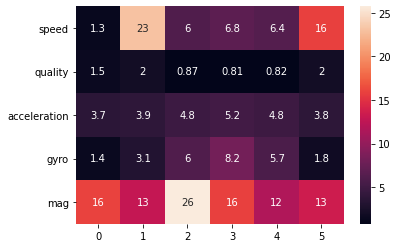

In [81]:
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

<AxesSubplot:>

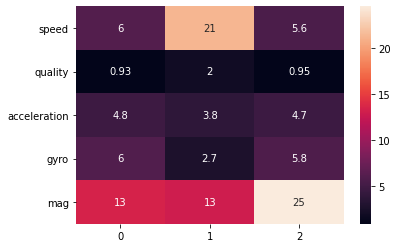

In [82]:
#Having so many clusters isn't helping, let's try with less parameters and only 3 clusters 

cluster_results = kmeans_cluster(clusters, 3)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='speed', ylabel='acceleration'>

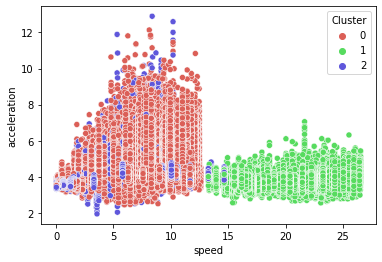

In [83]:
sns.scatterplot(cluster_results['speed'], cluster_results['acceleration'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='speed', ylabel='gyro'>

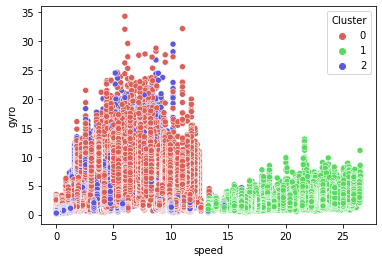

In [84]:
sns.scatterplot(cluster_results['speed'], cluster_results['gyro'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='speed', ylabel='mag'>

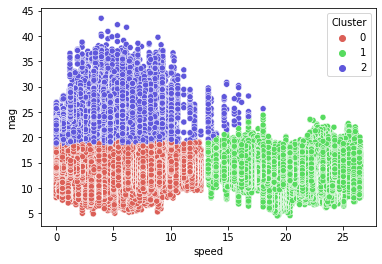

In [85]:
sns.scatterplot(cluster_results['speed'], cluster_results['mag'], hue=cluster_results['Cluster'], 
                palette=sns.color_palette('hls', 3))

In [86]:
data.groupby(['road']).mean()['acceleration']

road
asphalt_road        3.791385
cobblestone_road    4.950823
dirt_road           4.847817
Name: acceleration, dtype: float64

In [87]:
data.groupby(['road']).mean()['speed']

road
asphalt_road        17.092825
cobblestone_road     6.034603
dirt_road            6.607558
Name: speed, dtype: float64

<AxesSubplot:xlabel='timestamp_gps'>

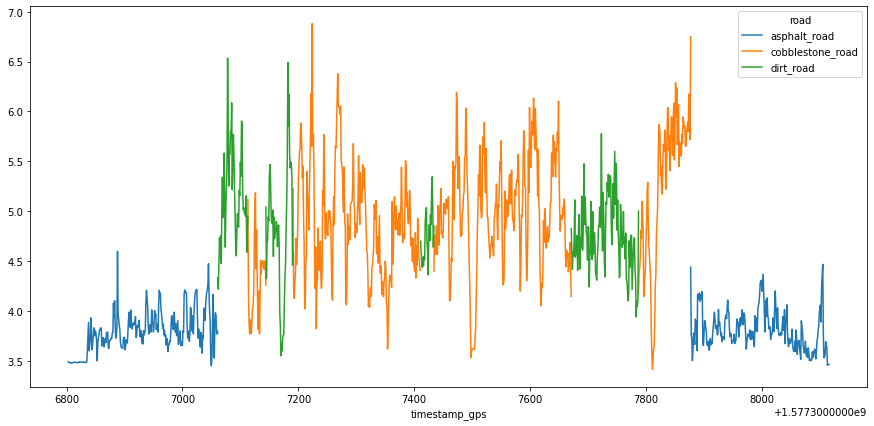

In [88]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['timestamp_gps','road']).mean()['acceleration'].unstack().plot(ax=ax)

#How type of road impacts acceleration